## ЛЧМ сигнал

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Линейная частотная модуляция

Сигналы с линейной частотной модуляцией (ЛЧМ) сигналы - это класс сигналов с частотной модуляцией, при которой частота несущего сигнала изменяется по линейному закону. 

В задачах радиолокации часто требуется получить заданную разрешающую способность по дальности, определяемую как минимальное расстояние между двумя целями, при которой дальность до каждой из целей определяется раздельно. Эта величина обратно пропорциональна ширине спектра сигнала. Следовательно необходимо увеличивать ширину спектра для уменьшения значения разрешающей способности.

Увеличение ширины спектра сигнала можно достичь с помощью уменьшения длительности сигнала. Но это в свою очередь приводит к уменьшению энергии сигнала и дальности обнаружения. Компромиссное решение - использование сигналов сложной формы, в частности - ЛЧМ-сигналов.

Функция изменения частоты линейна: 

$ f(t) = f_{0} + k t $ 

где:

- $ f_{0} = (F_{max} + F_{min}) / 2 $ - центральное значение несущей частоты.
- $ k = (F_{max}-F_{min}) / T_{c} $ - коэффициент модуляции
- $ T_c $ - длительность сигнала

Основное применение ЛЧМ-сигналов - задачи радиолокации. Широкополосные ЛЧМ сигналы позволяют обеспечить высокую разрешающую способность по дальности без уменьшения длительности посылаемых (зондируемых) импульсов.

Основное понятие ЛЧМ сигнала - это база сигнала, которая характеризуется произведением ширины спектра и длительности импульса сигнала. 

$ \beta = \Delta f \cdot \tau $

Если база ЛЧМ сигнала $ \beta >> 1 $, то его спектр стремится к прямоугольному виду, а фазовый спектр имеет квадратичную зависимость от частоты. Известно, что при прохождении через согласованный фильтр происходит сжатие ЛЧМ-сигнала. Это в свою очередь порождает узкий корреляционный пик большой амплитуды.  

Для сжатия ЛЧМ сигналов часто применяется операция быстрой свёртки, которая строится на базовых функциональных блоках цифровой обработки. Это ядра быстрого преобразования Фурье (БПФ), комплексные перемножители и блоки памяти, содержащие набор коэффициентов опорной функции.  

Как видно, базовые операции цифровой обработки применимы и к задачам радиолокации. 

ЛЧМ сигнал опишем формулой:

$ s(t) = A cos(2\pi f_{0}t + \pi\beta t^{2}) $ 

где

- $ A $ - амплитуда сигнала.
- $ f_{0} $ - начальное значение частоты,
- $ \beta $ - коэффициент ЛЧМ-модуляции,

In [4]:
def signal_chirp(amp = 1.0, freq = 0.0, beta = 0.25, period = 100, **kwargs):
    """
    Создание ЛЧМ сигнала

    Параметры
    ----------
    amp : float
        Амплитуда сигнала
    beta : float
        Коэффициент ЛЧМ-модуляции: beta < N for complex, beta < 0.5N for real
    freq : float or int
        Начальное значение частоты
    period : integer
        Период сигнала (число точек)
    kwargs : bool
        Комплексный сигнал если is_complex = True
        Модулирование синусоидальным сигналом если is_modsine = True
    """
    is_complex = kwargs.get('is_complex', False);
    is_modsine = kwargs.get('is_modsine', False);

    t = np.linspace(0, 1, period);
    tt = np.pi * (freq * t + beta * t ** 2);

    if is_complex is True:
        res = amp * (np.cos(tt) + 1j * np.sin(tt));
    else:
        res = amp * np.cos(tt);

    if is_modsine is True:
        return res * np.sin(np.pi * t);
    return res;

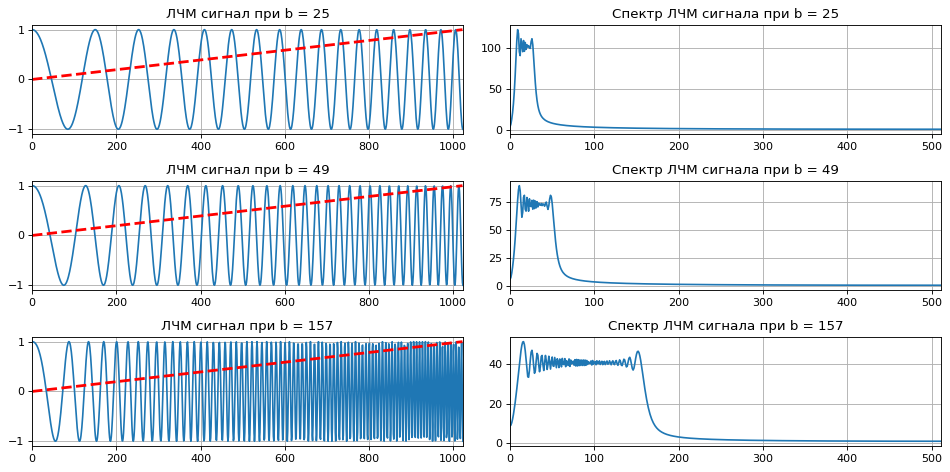

In [28]:
N = 1024;
beta = [25, 49, 157];

schirp = [signal_chirp(amp = 1, freq = 10, beta = i, period = N) for i in beta];

sft = np.abs(np.fft.fft(schirp, axis = 1));


plt.figure(figsize = (12, 6), dpi = 80);
for i, freq in enumerate(beta):
    plt.subplot(len(beta), 2, 2 * i + 1);
    plt.title(f'ЛЧМ сигнал при b = {freq}');
    plt.plot(schirp[i]);
    plt.plot(np.linspace(0, 1, N - 1), 'r--', linewidth = '2.5');
    plt.xlim([0, N - 1]);
    plt.grid(True);
    
    plt.subplot(len(beta), 2, 2 * i + 2);
    plt.title(f'Спектр ЛЧМ сигнала при b = {freq}');
    plt.plot(sft[i]);
    plt.xlim([0, N // 2 - 1]);
    plt.grid(True);
plt.tight_layout();

### Комплексный ЛЧМ сигнал

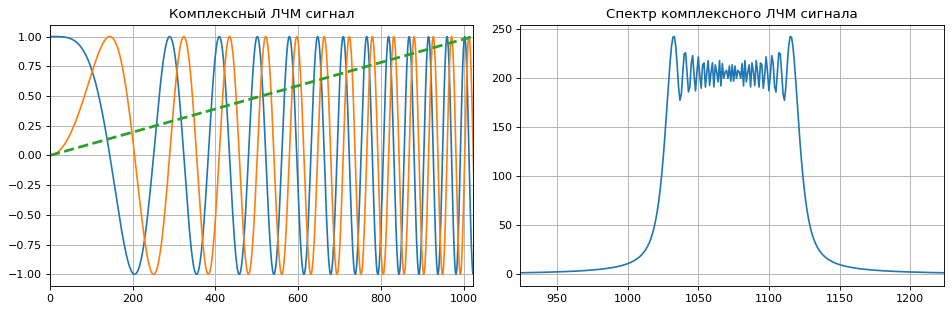

In [8]:
N = 2048;
beta = 100;

schirp = signal_chirp(amp = 1, freq = 0, beta = beta, period = N, is_complex = True);

sft = np.abs(np.fft.fftshift(np.fft.fft(schirp)));


plt.figure(figsize = (12, 4), dpi = 80);
plt.subplot(1, 2, 1);
plt.title('Комплексный ЛЧМ сигнал');
plt.plot(np.real(schirp));
plt.plot(np.imag(schirp));
plt.plot(np.linspace(0, 1, N // 2), '--', linewidth = '2.5');
plt.xlim([0, N // 2]);
plt.grid(True);
    
plt.subplot(1, 2, 2);
plt.title('Спектр комплексного ЛЧМ сигнала');
plt.plot(sft);
plt.xlim([N // 2 - beta, N // 2 + 2 * beta]);
plt.grid(True);
plt.tight_layout();